# Paper results


In [1]:
from code import * 
from code import advection_diffusion_inference_utils
import sys
sys.modules['advection_diffusion_inference_utils'] =  advection_diffusion_inference_utils
import matplotlib.pyplot as plt
%matplotlib inline

Reading file:  /Users/amal/Documents/research_code/CUQI-DTU/Collab-BrainEfflux-Data/A_Considered_for_the_paper/results_feb7/paperV4CARealDiff_Gauss4_gibbs_scale_all_repeat/outputm1_r_NUTSWithGibbs_constant_100.0_real_heterogeneous_2000_0.2_paperV4CARealDiff_Gauss4_gibbs_scale_all_repeat__0_5_0.0_fromDataClip/m1_r_NUTSWithGibbs_constant_100.0_real_heterogeneous_2000_0.2_paperV4CARealDiff_Gauss4_gibbs_scale_all_repeat__0_5_0.0_fromDataClip_var.pkl
Reading file:  /Users/amal/Documents/research_code/CUQI-DTU/Collab-BrainEfflux-Data/A_Considered_for_the_paper/results_feb7/paperV4CARealAdvDiff_Gauss4_gibbs_scale_all_repeat/outputm1_r_NUTSWithGibbs_constant_100.0_real_advection_diffusion_2000_0.2_paperV4CARealAdvDiff_Gauss4_gibbs_scale_all_repeat__0_5_0.0_fromDataClip/m1_r_NUTSWithGibbs_constant_100.0_real_advection_diffusion_2000_0.2_paperV4CARealAdvDiff_Gauss4_gibbs_scale_all_repeat__0_5_0.0_fromDataClip_var.pkl
Reading file:  /Users/amal/Documents/research_code/CUQI-DTU/Collab-BrainEfflux-

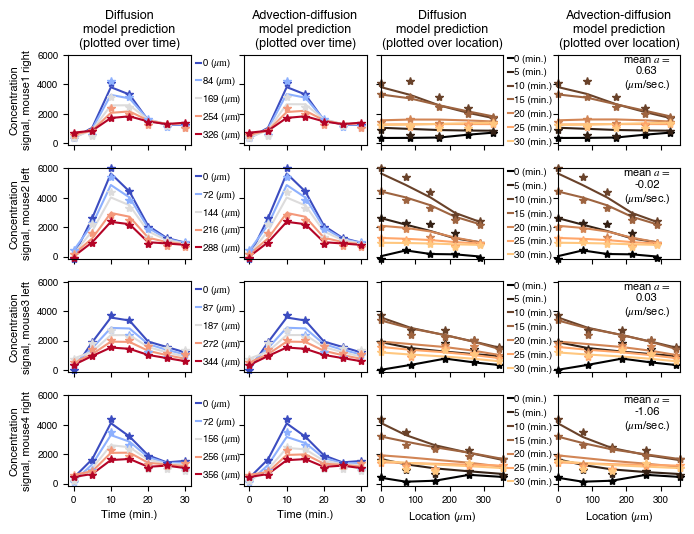

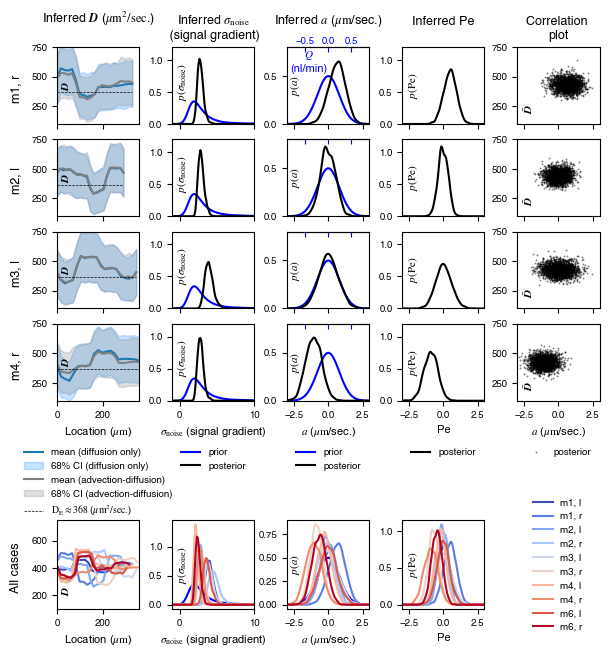

In [2]:
scenarios_dir = [
    "/Users/amal/Documents/research_code/CUQI-DTU/Collab-BrainEfflux-Data/A_Considered_for_the_paper/results_feb7"
    ]
scenario_tags_list = [
    ["paperV4CARealDiff_Gauss4_gibbs_scale_all_repeat",
     "paperV4CARealAdvDiff_Gauss4_gibbs_scale_all_repeat",
     "NUTSWithGibbs_constant_100.0_real_heterogeneous_2000_0.2_paperV4CARealDiff_Gauss4_gibbs_scale_all_repeat__0_5_0.0_fromDataClip",
     "NUTSWithGibbs_constant_100.0_real_advection_diffusion_2000_0.2_paperV4CARealAdvDiff_Gauss4_gibbs_scale_all_repeat__0_5_0.0_fromDataClip"],

    ]

num_scenarios = len(scenarios_dir)
figs_to_plot = [[1, 2, 3]]*num_scenarios
physics = [['diffusion', 'advection-diffusion']]*num_scenarios

i = 0
animal_ear = [
    ('m1', 'r'),
    ('m2', 'l'),
    ('m3', 'l'),
    ('m4', 'r')
    ]
#animal_ear = [
#    ('m2', 'l')
#    ]
all_animals_ears = []
for animal in all_animals():
    for ear in all_ears():
        all_animals_ears.append((animal, ear))
data_diff_list, data_adv_list = read_all_scenarios_2(scenarios_dir[i], scenario_tags_list[i], animal_ear)
data_diff_list_all, data_adv_list_all = read_all_scenarios_2(scenarios_dir[i], scenario_tags_list[i], all_animals_ears)

# create directory if it does not exist
import os
os.makedirs('figures/'+scenario_tags_list[i][0], exist_ok=True)

colormaps = [plt.colormaps.get_cmap('coolwarm'),
             plt.colormaps.get_cmap('copper')]
if 1 in figs_to_plot[i]:

        plot_v3_fig1_c( data_diff_list, data_adv_list, colormaps=colormaps)
        #plt.tight_layout()
        plt.savefig('figures/'+scenario_tags_list[i][0]+'/fig3_c.pdf', bbox_inches='tight') 
        pass
if 2 in figs_to_plot[i]:
        all_samples_a = plot_v3_fig2_II( data_diff_list, data_adv_list, data_diff_list_all, data_adv_list_all, d_y_coor=0.5)
        # save figure and remove white space
        plt.savefig('figures/'+scenario_tags_list[i][0]+'/fig2.pdf', bbox_inches='tight')
        #plt.savefig('figures/'+scenario_tags_list[i][0]+'/fig2.png')





In [3]:
if 3 in figs_to_plot[i]:
    SMALL_SIZE = 7
    MEDIUM_SIZE =8
    BIGGER_SIZE = 9
    matplotlib_setup(SMALL_SIZE, MEDIUM_SIZE, BIGGER_SIZE)

    real_times, real_locations, real_data, real_std_data, diff_locations, real_data_diff, real_std_data_diff = read_data_files(data_diff_list[0]['experiment_par'])

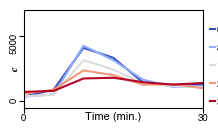

In [4]:
if 3 in figs_to_plot[i]:
### Over time
    fig = plt.figure(figsize=(7*0.35, 0.5*7/2*0.66))
    plt.subplots_adjust(right=0.79, top=0.98, left=0.06, bottom=0.13)
    # set left, right, top, bottom to 0.1, 0.9, 0.9, 0.1
    #plt.subplots_adjust(left=0.2, right=0.9, top=0.9, bottom=0.1)

    lines, legend = plot_time_series(real_times, real_locations,
                    real_data.reshape(len(real_locations), len(real_times)), plot_legend=False, plot_type='over_time', d3_alpha=0.85,
                    colormap=colormaps[0])
    #plt.legend(lines, legend, loc='center left', bbox_to_anchor=(1, 0.5))
    plt.legend(lines, legend,
                        fontsize=SMALL_SIZE, frameon=False, ncol=1,
                        columnspacing=0.1, handletextpad=0.1, handlelength=0.5,
                        loc='upper right',
                        bbox_to_anchor=(0.99, 0.945),  mode="expand")
    plt.yticks(rotation=90, ticks=[0, 5000]) 
    plt.gca().tick_params(axis='y', pad=0)
    plt.gca().tick_params(axis='x', pad=1)
    plt.ylabel(r"$\boldsymbol{c}$")
    plt.gca().yaxis.set_label_coords(-0.02,0.4)

    plt.xticks(ticks=[0, 30])
    plt.xlabel("Time (min.)", labelpad=-8)
    plt.xlim([0, 30])
    plt.ylim([-500, 7000])
    # only 2 ticks
    #plt.locator_params(axis='y', nb
    #                   =2)
    #plt.tight_layout()
    plt.savefig('figures/'+scenario_tags_list[i][0]+'/fig3_over_time.pdf')

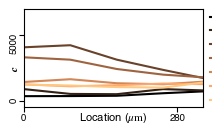

In [5]:
if 3 in figs_to_plot[i]:
### Over space
    fig = plt.figure(figsize=(7*0.35, 0.5*7/2*0.66))
    plt.subplots_adjust(right=0.79, top=0.98, left=0.06, bottom=0.13)
    # set left, right, top, bottom to 0.1, 0.9, 0.9, 0.1
    #plt.subplots_adjust(left=0.2, right=0.9, top=0.9, bottom=0.1)

    lines, legend = plot_time_series(real_times, real_locations,
                    real_data.reshape(len(real_locations), len(real_times)), plot_legend=False, plot_type='over_location', d3_alpha=0.85,
                    colormap=colormaps[1])
    #plt.legend(lines, legend, loc='center left', bbox_to_anchor=(1, 0.5))
    plt.legend(lines, legend,
                        fontsize=SMALL_SIZE, frameon=False, ncol=1,
                        columnspacing=0.1, handletextpad=0.1, handlelength=0.5,
                        loc='upper right',
                        bbox_to_anchor=(0.99, 1.05),  mode="expand")
    plt.yticks(rotation=90, ticks=[0, 5000]) 
    plt.gca().tick_params(axis='y', pad=0)
    plt.gca().tick_params(axis='x', pad=1)
    plt.ylabel(r"$\boldsymbol{c}$", labelpad=0)
    plt.gca().yaxis.set_label_coords(-0.02,0.4)

    plt.xticks(ticks=[0, 280])
    plt.xlabel("Location ("+r"$\mu\mathrm{m}$"+")", labelpad=-9)
    plt.xlim([0, real_locations[-1]])
    plt.ylim([-500, 7000])
    # only 2 ticks
    #plt.locator_params(axis='y', nb
    #                   =2)
    #plt.tight_layout()
    plt.savefig('figures/'+scenario_tags_list[i][0]+'/fig3_over_space.pdf')




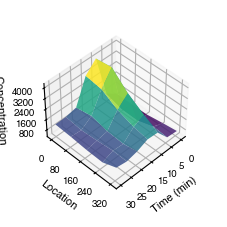

In [6]:
if 3 in figs_to_plot[i]:   
    ### 3D
    fig = plt.figure(figsize=(7*0.35, 7/2*0.66))

    plt.subplots_adjust(left=0.2, right=0.9, top=0.9, bottom=0.1)

    lines, legend = plot_time_series(real_times, real_locations,
                    real_data.reshape(len(real_locations), len(real_times)), plot_legend=False, plot_type='surface', d3_alpha=0.85)

    ax = plt.gca()
    ax.view_init(45, 45)
    # update vertical axis to reduce number of ticks
    ax.yaxis.set_major_locator(plt.MaxNLocator(5))
    ax.zaxis.set_major_locator(plt.MaxNLocator(5))
    ax.set_box_aspect(aspect=None, zoom=0.75)
    plt.tight_layout()
    plt.savefig('figures/'+scenario_tags_list[i][0]+'/fig3_surface.pdf')



20020


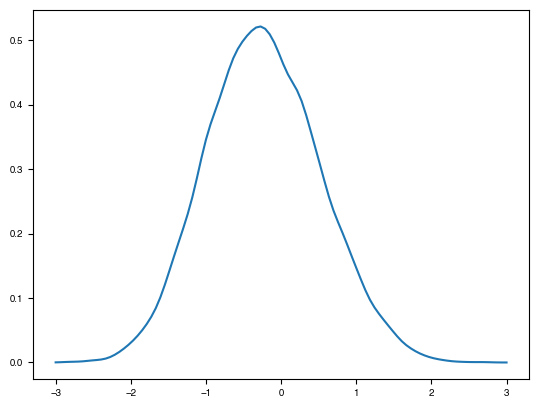

In [7]:
all_samples_a_array = np.array(all_samples_a).flatten()
# plot KDE
fig, ax = plt.subplots(1,1)
from scipy.stats import gaussian_kde
kde = gaussian_kde(all_samples_a_array)
x = np.linspace(-3, 3, 100)
y = kde(x)
ax.plot(x, y)
print(len(all_samples_a_array))
